In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch
from models import SimpleNN
from train_eval_mnist import mnist_experiment

num_tasks = 3
epochs_per_task = 5
input_size = 28 * 28
hidden_size = 256
output_size = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epoch_accuracies1, accuracies1 = mnist_experiment(SimpleNN(input_size, hidden_size, output_size).to(device))
epoch_accuracies2, accuracies2 = mnist_experiment(SimpleNN(input_size, hidden_size, output_size, learnable=True).to(device))

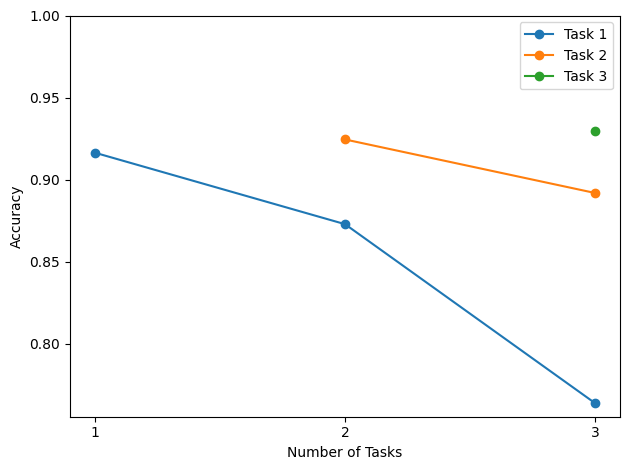

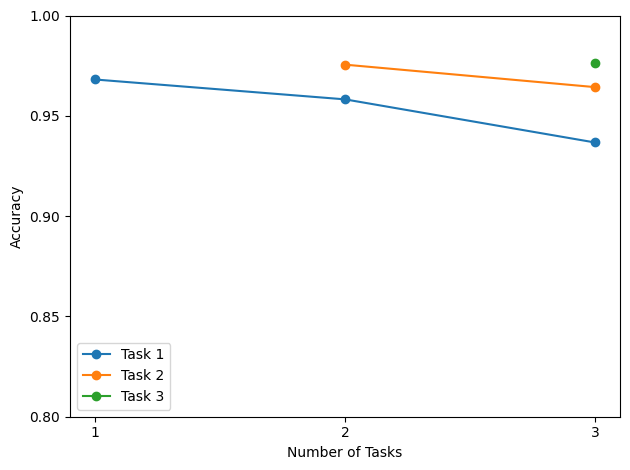

In [23]:
def plot(accuracies):
  # Plot forgetting
  for task_id in range(num_tasks):
      accs = [accuracies[i][task_id] if task_id < len(accuracies[i]) else None for i in range(num_tasks)]
      plt.plot(range(1, num_tasks+1), accs, marker='o', label=f"Task {task_id+1}")

  plt.xlabel("Number of Tasks")
  plt.ylabel("Accuracy")
  plt.yticks([0.8, 0.85, 0.9, 0.95, 1.0])
  plt.xticks(range(1, num_tasks + 1))
  plt.grid(False)
  plt.tight_layout()
  plt.legend()
  plt.show()

plot(accuracies1)
plot(accuracies2)

/var/folders/_k/4jtxm3yd51qgn2ztc28_6lt80000gn/T/ipykernel_40900/2295166178.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


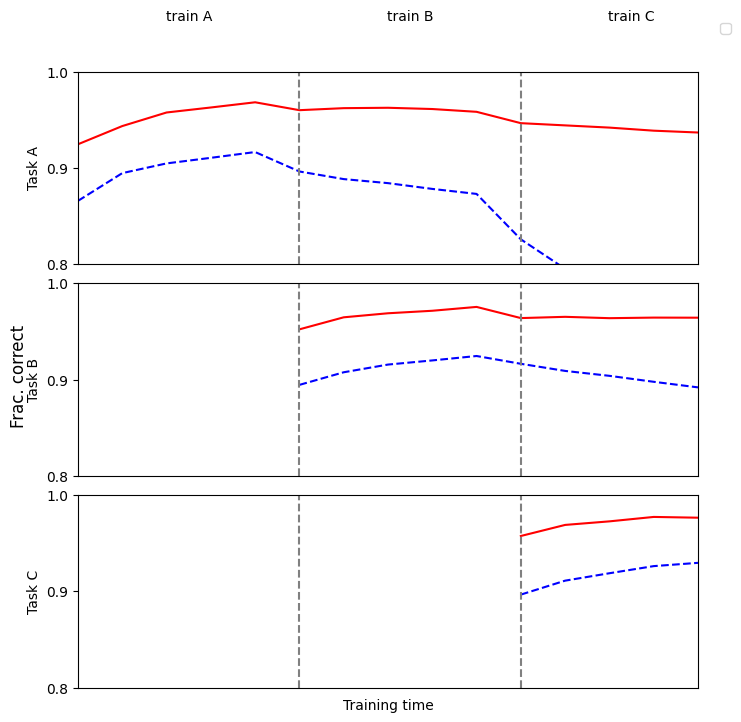

In [12]:

total_epochs = num_tasks * epochs_per_task

def pad_epoch_accuracies(epoch_accuracies):
    max_tasks = max(len(row) for row in epoch_accuracies)
    padded = []
    for row in epoch_accuracies:
        row = list(row)
        padded_row = row + [np.nan] * (max_tasks - len(row))
        padded.append(padded_row)
    return np.array(padded)

epoch_accuracies1 = pad_epoch_accuracies(epoch_accuracies1)
epoch_accuracies2 = pad_epoch_accuracies(epoch_accuracies2)


fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(num_tasks, 1, hspace=0.1)
axes = []

x = np.arange(total_epochs)

colors = ['blue', 'red']
linestyles = ['dashed', 'solid']

methods = [
    (epoch_accuracies1, colors[0], linestyles[0]),
    (epoch_accuracies2, colors[1], linestyles[1]),
]

for task_idx in range(num_tasks):
    ax = fig.add_subplot(gs[task_idx, 0])
    axes.append(ax)

    # Plot each method on top of each other
    for method_idx, (epoch_accs, color, linestyle) in enumerate(methods):
        ax.plot(x, epoch_accs[:, task_idx], color=color, linestyle=linestyle)

    ax.set_ylim(0.8, 1.0)
    ax.set_xlim(0, total_epochs-1)
    ax.set_yticks([0.8, 0.9, 1.0])

    if task_idx != num_tasks - 1:
        ax.set_xticks([])
    else:
        ax.set_xticks([])
        ax.set_xlabel("Training time")

    ax.set_ylabel(f"Task {chr(65 + task_idx)}")

    for split in range(epochs_per_task, total_epochs, epochs_per_task):
        ax.axvline(x=split, color='gray', linestyle='--')

for idx in range(num_tasks):
    split_start = idx * epochs_per_task
    split_mid = split_start + epochs_per_task / 2
    axes[0].text(split_mid, 1.05, f"train {chr(65 + idx)}", ha='center', va='bottom', fontsize=10)

fig.text(0.04, 0.5, "Frac. correct", va='center', rotation='vertical', fontsize=12)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95))
plt.tight_layout()
plt.show()